In [1]:
import os
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
gpu_options = tf.GPUOptions(allow_growth=True)
sess_config = tf.ConfigProto(gpu_options=gpu_options)
tf.keras.backend.set_session(tf.Session(config=sess_config))

In [2]:
import os
import glob
#import tqdm
import numpy as np
#import pandas as pd
import multiprocessing
import pydicom as dicom
import nibabel as nib
#from keras import utils as kutils
from matplotlib import pyplot as plt

def load_image(label_fpath, transpose=False):
    #encode_name = label_fpath[-39: -7]
    label_data = nib.load(label_fpath)
    label_array = label_data.get_fdata()
    if transpose:
        label_array = np.transpose(label_array, axes=(2, 1, 0))
    return  label_array#, encode_name

In [3]:
import pandas as pd
info = pd.read_csv('/data2/pancreas/Nifti_data/data_list.csv')
image_path = "/data2/pancreas/Nifti_data/image"
label_path = "/data2/pancreas/Nifti_data/label"


resec = np.load("resec.npy")
y = np.load("resec_y.npy")


In [85]:
del label_t
label_t = load_image(os.path.join(label_path, "LB_"+resec[1]+".nii.gz"))

In [31]:
np.where(label_t != 0)

(array([177, 177, 177, ..., 333, 333, 333]),
 array([226, 227, 228, ..., 265, 266, 267]),
 array([30, 30, 30, ..., 32, 32, 32]))

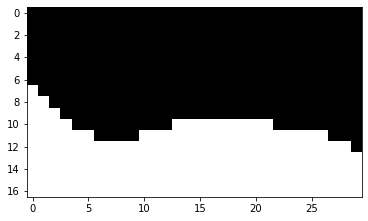

In [96]:
plt.imshow(label_t[230:247, 300:330,30], cmap = "gray")

In [97]:
label_t[230:247, 300:330,30]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0

In [69]:
print(np.min(np.where(label_t == 1)[2]))
print(np.max(np.where(label_t == 1)[2]))

25
34


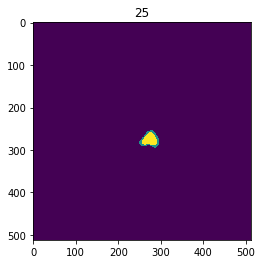

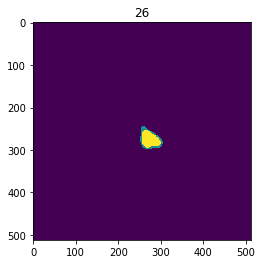

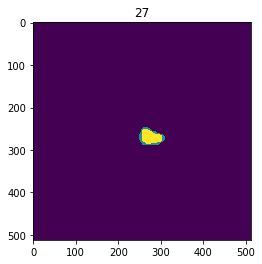

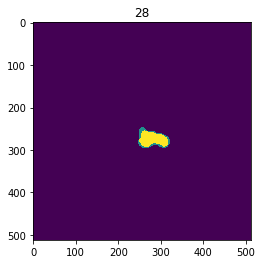

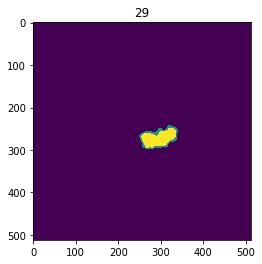

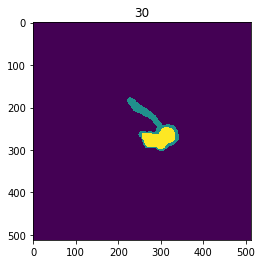

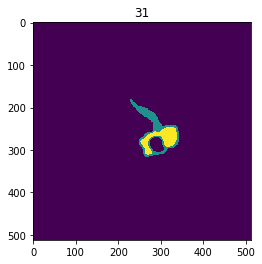

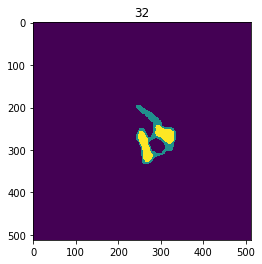

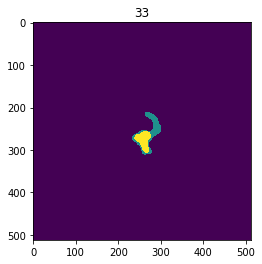

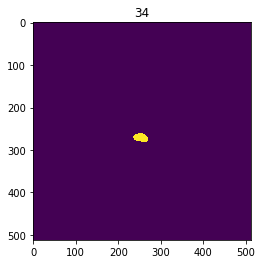

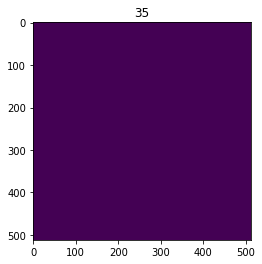

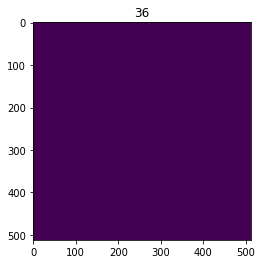

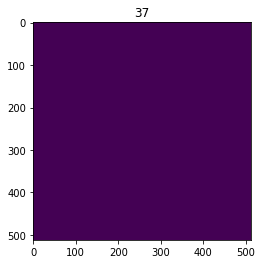

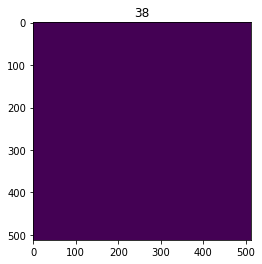

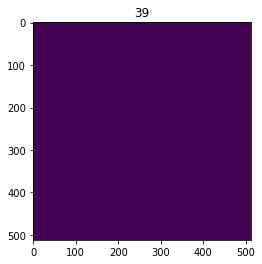

In [70]:
for i in range(25, 40):
    plt.title(str(i))
    plt.imshow(label_t[..., i])
    plt.show()

In [98]:
#determine the size of cube using label-img (consider tumor only)
shape0 = np.zeros((len(resec), 2))
shape1 = np.zeros((len(resec), 2))
shape2 = np.zeros((len(resec), 2))
for i, name in enumerate(resec) :
    label = load_image(os.path.join(label_path, "LB_"+name+".nii.gz"))
    print(name)
    shape0[i][0] = np.min(np.where(label == 2)[0])
    shape0[i][1] = np.max(np.where(label == 2)[0])
    shape1[i][0] = np.min(np.where(label == 2)[1])
    shape1[i][1] = np.max(np.where(label == 2)[1])
    shape2[i][0] = np.min(np.where(label == 2)[2])
    shape2[i][1] = np.max(np.where(label == 2)[2])
    del label

PC614
PC83
PC139
PC534
PC104
PT51
PC550
PC294
PC605
PC621
PC117
PC335
PC159
PC125
PC647
PC285
PC631
PC160
PC638
PT6
PC555
PC319
PC176
PC55
PC548
PC515
PC603
PC131
PC98
PC572
PC560
PT27
PC612
PC619
PC568
PC536
PC301
PC50
PC242
PC103
PC652
PC273
PC15
PC584
PC151
PC636
PC573
PC579
PC553
PC358
PC563
PC147
PC651
PC306
PC290
PC618
PC574
PT2
PC1
PC575
PC97
PC630
PC595
PC542
PC556
PC72
PC116
PC537
PC387
PT4
PC653
PC246
PC546
PC570
PC115
PC616
PT52
PC143
PC650
PC513
PC278
PC252
PC541
PC348
PC622
PC38
PC181
PT37
PC110
PC304
PC543
PC648
PC589
PC644
PC3
PC5
PC552
PC590
PC251
PC564
PC269
PT7
PC144
PC601
PC63
PC267
PT1
PT13
PC39
PC105
PC634
PC539
PC31
PC639
PC41
PC152
PC538
PC561
PC554
PC96
PC623
PC166
PT9
PC27
PC295
PC582
PC549
PC585
PC332
PT12
PT59
PC581
PC336
PC89
PC580
PC567
PT53
PC170
PC107
PC134
PC596
PC79
PC629
PC322
PC130
PC350
PT39
PC78
PC58
PC42
PT8
PC259
PC551
PC37
PC70
PC2
PT35
PC91
PC303
PC600
PC510
PC544
PC545
PC123
PC54
PC559
PC535
PC277
PT42
PT47
PC349
PC40
PC256
PC627
PC602
PC607
PT

In [101]:
print(np.max(shape0[:, 1] - shape0[:, 0]))
print(np.max(shape1[:, 1] - shape1[:, 0]))
print(np.max(shape2[:, 1] - shape2[:, 0]))

207.0
220.0
89.0


In [113]:
# shape_tumor = np.concatenate([shape0, shape1, shape2], axis = 1)

In [4]:
shape_tumor = np.load("shape_tumor.npy")
#np.save( "shape_tumor", shape_tumor)

In [73]:
label_t = load_image(os.path.join(label_path, "LB_"+"PT27"+".nii.gz"))

In [76]:
print(np.min(np.where(label_t != 0)[2]))
print(np.max(np.where(label_t != 0)[2]))

263
352


In [116]:
# for i in range(263, 352):
#     plt.imshow(label_t[..., i])
#     plt.show()

In [115]:
del label_t

# model

In [5]:
import pandas as pd
map_df = pd.DataFrame(data={'resec_name': resec, 'shape': np.array(range(182)), 'target':y.reshape(182)})

In [6]:
#New
def extract_cube(r, img):#cube 210, 220, 90 ;; ranges = [xmin, xmax, ymin, ymax, zmin, zmax]
    img_tmp = np.zeros((210, 220, 90))
    img_tmp[:int(r[1]-r[0]), :int(r[3]-r[2]), :int(r[5]-r[4])] = img[int(r[0]):int(r[1]), int(r[2]):int(r[3]), int(r[4]):int(r[5])]
    return img_tmp

In [7]:
from keras.models import Model#, load_model
from keras import layers as klayers
from keras.optimizers import Adam
from keras import utils as kutils
from keras import backend as K
from keras.callbacks import ModelCheckpoint



from keras.layers import Conv3D, MaxPool3D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
#from plotly.offline import iplot, init_notebook_mode
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
#import plotly.graph_objs as go
from matplotlib.pyplot import cm
from keras.models import Model
import numpy as np
import keras
import h5py

#init_notebook_mode(connected=True)
%matplotlib inline


from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, concatenate,  MaxPool2D
# from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D, Lambda
from keras.layers.advanced_activations import LeakyReLU, ReLU
from keras.layers.convolutional import UpSampling2D, Conv2D, Conv1D
from keras.models import Sequential, Model
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector, Reshape
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline



Using TensorFlow backend.


In [8]:
from keras.utils import to_categorical

class resec_Generator1(kutils.Sequence):
    'Generates data for Keras'
    def __init__(self, mapping_df, batch_size, shuffle=True):
        'Initialization'
        self.mapping_df = mapping_df
        self.data_num   = mapping_df.shape[0]
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(self.data_num / self.batch_size))


    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        #print("enter0")
        batch_mapping_df = \
            self.mapping_df.iloc[index*self.batch_size: (index+1)*self.batch_size]

        # Generate data
        X, y = self.__data_generation(batch_mapping_df)
        return X, y


    def on_epoch_end(self):
        'Updates indexes after each epoch'
        if self.shuffle:
            self.mapping_df = self.mapping_df.sample(frac=1).reset_index(drop=True)
            
    def __data_generation(self, batch_mapping_df):
        'Generates data containing batch_size samples' 
        # Initialization
        X = np.zeros((  self.batch_size, 210, 220, 90, 1)) 

        y = np.zeros((self.batch_size))

        # Generate data
        cnt = 0
        
        for i, row in batch_mapping_df.iterrows():
            img = extract_cube(shape_tumor[row['shape']], load_image(os.path.join(image_path, "IM_"+row['resec_name']+".nii.gz")))
            X[ cnt, :, :, :, 0] = img
            
            #img = clip_img(load_image(os.path.join(image_path, "IM_"+row['resec_name']+".nii.gz")))
            #print("resec_name =", row['resec_name'])
#             for j in range(40):
#                 #print("img shape =", img.shape)
#                 #print("j =", j)
#                 X[j][cnt, :, :, :, 0] = extract_cube(img, j)
            y[cnt] = row['target']

#             position = extract_position(row['ref_idx'], row['point_idx'])
#             tmp_cube = extract_cube(position, row['ref_idx'])
#             if (tmp_cube.shape == (19, 19, 19)):
#                 X[cnt, :, :, :, 0] = extract_cube(position, row['ref_idx'])
#             else:
#                 X[cnt, :, :, :, 0] = np.zeros((19, 19, 19))
#             y_idx = row['y_idx']
#             radius = ref[row['ref_idx']][row['point_idx'], 3]
#             y1[cnt, y_idx] = 1
#             y2[cnt, 0] = radius
            cnt += 1
        #print(X[5])
        return X, y

# for name in resec:
#     img = load_image(os.path.join(image_path, "IM_"+name+".nii.gz"))

In [9]:
from keras import metrics
tmp_x = Input((210, 220, 90, 1))
x = Conv3D(filters=32, dilation_rate=1, kernel_size=(3, 3, 3), activation='relu')(tmp_x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = MaxPool3D()(x)

x = Conv3D(filters=16, dilation_rate=1, kernel_size=(3, 3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = MaxPool3D()(x)

x = Conv3D(filters=8, dilation_rate=1, kernel_size=(3, 3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool3D()(x)



x = Conv3D(filters=4, dilation_rate=1, kernel_size=(3, 3, 3), activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool3D()(x)






x = Flatten()(x)
x = Dense(units=500, kernel_initializer='normal', activation='elu')(x)
x = Dense(units=100, kernel_initializer='normal', activation='relu')(x)
x = Dense(units=1, kernel_initializer='normal', activation='sigmoid')(x)

model = Model(inputs=tmp_x, outputs=x)
adam_lr = 0.0002
adam_beta_1 = 0.5
model.compile(optimizer=Adam(lr=adam_lr, beta_1=adam_beta_1),
              loss='binary_crossentropy', metrics = [metrics.binary_accuracy])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 210, 220, 90, 1)   0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 208, 218, 88, 32)  896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 208, 218, 88, 32)  128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 208, 218, 88, 32)  0         
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 104, 109, 44, 32)  0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 102, 107, 42, 16)  13840     
_________________________________________________________________
batch_normalization_2 (Batch (None, 102, 107, 42, 16)  64        
__________

In [11]:
batch_size = 1
v_generator = resec_Generator1(map_df[:-50], batch_size=batch_size)
validation_generator = resec_Generator1(map_df[-50:-30], batch_size=batch_size)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [13]:
history = model.fit_generator(v_generator,
                              epochs=100, validation_data=validation_generator)

Epoch 1/100
132/132 [==============================] - 194s 1s/step - loss: 0.4444 - binary_accuracy: 0.7879 - val_loss: 0.6211 - val_binary_accuracy: 0.5500
Epoch 2/100
132/132 [==============================] - 187s 1s/step - loss: 0.4190 - binary_accuracy: 0.8030 - val_loss: 0.5914 - val_binary_accuracy: 0.7000
Epoch 3/100
132/132 [==============================] - 190s 1s/step - loss: 0.3851 - binary_accuracy: 0.8106 - val_loss: 0.5874 - val_binary_accuracy: 0.7500
Epoch 4/100
132/132 [==============================] - 191s 1s/step - loss: 0.3924 - binary_accuracy: 0.8333 - val_loss: 0.6026 - val_binary_accuracy: 0.6000
Epoch 5/100
132/132 [==============================] - 188s 1s/step - loss: 0.3384 - binary_accuracy: 0.8333 - val_loss: 0.5828 - val_binary_accuracy: 0.6000
Epoch 6/100
132/132 [==============================] - 190s 1s/step - loss: 0.3124 - binary_accuracy: 0.8712 - val_loss: 0.5815 - val_binary_accuracy: 0.6000
Epoch 7/100
132/132 [==============================]

132/132 [==============================] - 188s 1s/step - loss: 0.0575 - binary_accuracy: 0.9773 - val_loss: 0.5721 - val_binary_accuracy: 0.6000
Epoch 53/100
132/132 [==============================] - 187s 1s/step - loss: 0.0931 - binary_accuracy: 0.9697 - val_loss: 0.5808 - val_binary_accuracy: 0.5500
Epoch 54/100
132/132 [==============================] - 187s 1s/step - loss: 0.0051 - binary_accuracy: 1.0000 - val_loss: 0.5746 - val_binary_accuracy: 0.6000
Epoch 55/100
132/132 [==============================] - 189s 1s/step - loss: 0.0083 - binary_accuracy: 1.0000 - val_loss: 0.5731 - val_binary_accuracy: 0.6000
Epoch 56/100
132/132 [==============================] - 192s 1s/step - loss: 0.0034 - binary_accuracy: 1.0000 - val_loss: 0.5682 - val_binary_accuracy: 0.5500
Epoch 57/100
132/132 [==============================] - 188s 1s/step - loss: 0.0069 - binary_accuracy: 1.0000 - val_loss: 0.5632 - val_binary_accuracy: 0.5500
Epoch 58/100
132/132 [==============================] - 186

In [127]:
history = model.fit_generator(v_generator,
                              epochs=15, validation_data=validation_generator)

Epoch 1/15
132/132 [==============================] - 194s 1s/step - loss: 0.4268 - binary_accuracy: 0.8409 - val_loss: 0.7253 - val_binary_accuracy: 0.5000
Epoch 2/15
132/132 [==============================] - 194s 1s/step - loss: 0.4022 - binary_accuracy: 0.8030 - val_loss: 0.6449 - val_binary_accuracy: 0.5500
Epoch 3/15
132/132 [==============================] - 198s 2s/step - loss: 0.4198 - binary_accuracy: 0.7803 - val_loss: 0.6221 - val_binary_accuracy: 0.5500
Epoch 4/15
132/132 [==============================] - 192s 1s/step - loss: 0.3559 - binary_accuracy: 0.8030 - val_loss: 0.6237 - val_binary_accuracy: 0.5500
Epoch 5/15
132/132 [==============================] - 198s 2s/step - loss: 0.2696 - binary_accuracy: 0.8939 - val_loss: 0.6279 - val_binary_accuracy: 0.5000
Epoch 6/15
132/132 [==============================] - 192s 1s/step - loss: 0.2535 - binary_accuracy: 0.9015 - val_loss: 0.6315 - val_binary_accuracy: 0.5000
Epoch 7/15
132/132 [==============================] - 189s

In [128]:
history1 = model.fit_generator(v_generator,
                              epochs=10, validation_data=validation_generator)

Epoch 1/10
132/132 [==============================] - 194s 1s/step - loss: 0.1380 - binary_accuracy: 0.9318 - val_loss: 0.7722 - val_binary_accuracy: 0.5500
Epoch 2/10
132/132 [==============================] - 193s 1s/step - loss: 0.0748 - binary_accuracy: 0.9697 - val_loss: 0.6996 - val_binary_accuracy: 0.5000
Epoch 3/10
132/132 [==============================] - 192s 1s/step - loss: 0.1591 - binary_accuracy: 0.9394 - val_loss: 0.6240 - val_binary_accuracy: 0.6500
Epoch 4/10
132/132 [==============================] - 197s 1s/step - loss: 0.1604 - binary_accuracy: 0.9621 - val_loss: 0.7663 - val_binary_accuracy: 0.4500
Epoch 5/10
132/132 [==============================] - 193s 1s/step - loss: 0.0686 - binary_accuracy: 0.9697 - val_loss: 0.8193 - val_binary_accuracy: 0.5000
Epoch 6/10
132/132 [==============================] - 192s 1s/step - loss: 0.0556 - binary_accuracy: 0.9773 - val_loss: 0.8885 - val_binary_accuracy: 0.4500
Epoch 7/10
132/132 [==============================] - 191s

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


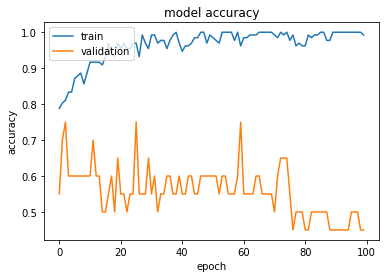

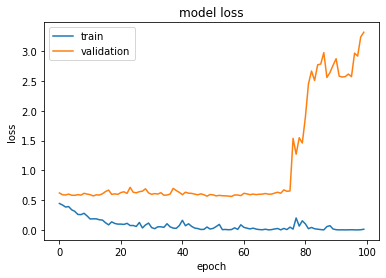

In [14]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()